# Grouping

In [65]:
%matplotlib inline

In [1]:
import pandas as pd
data = pd.read_csv('user_device.csv', sep=",")

In [2]:
data.head(5)

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [75]:
data['device'].value_counts().head(10)

SM-G900F         32
iPhone7,2        27
iPhone6,2        22
GT-I9505         13
ONEPLUS A3003     9
SM-G920F          8
SM-G925F          7
SM-G361F          6
iPhone5,2         6
SM-J320FN         6
Name: device, dtype: int64

In [43]:
# data.groupby(['device'],as_index=False)['user_id'].count()
sort = data.groupby('device', as_index=False)['user_id'].agg({"count": "count"})
sort.sort_values(['count'],ascending=False).head(10)

,device,count
43,SM-G900F,32
67,"iPhone7,2",27
65,"iPhone6,2",22
12,GT-I9505,13
35,ONEPLUS A3003,9
45,SM-G920F,8
46,SM-G925F,7
16,HTC Desire 510,6
40,SM-G361F,6
63,"iPhone5,2",6


In [56]:
data[['user_id','device']].head(5)  #to select 2 columns need [[]] construction

,user_id,device
0,26980,"iPhone7,2"
1,29628,Nexus 5
2,28473,SM-G903F
3,15200,"iPhone7,2"
4,28239,ONE E1003


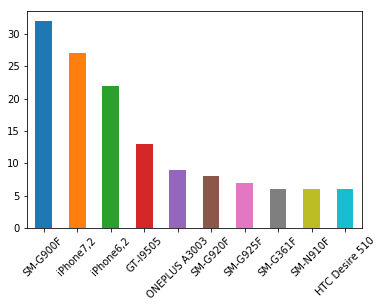

In [98]:
data['device'].value_counts().head(10).plot(kind = 'bar', rot = 45)

# JOINS

#### Pandas

In [31]:
!pip install pandasql

  Running setup.py bdist_wheel for pandasql: started
  Running setup.py bdist_wheel for pandasql: finished with status 'done'
  Stored in directory: C:\Users\bulat\AppData\Local\pip\Cache\wheels\53\6c\18\b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [32]:
import time as tm, pandas as pd, pandasql as ps

In [3]:
devices = pd.read_csv('user_device.csv', sep=",")
usage = pd.read_csv('user_usage.csv', sep=",")

In [6]:
from IPython.core.interactiveshell import InteractiveShell  #to run all statements in cell, not only the last
InteractiveShell.ast_node_interactivity = "all"

In [7]:
devices.shape
devices.shape[0]
devices.shape[1]

(272, 6)

272

6

In [26]:
usage.shape

(240, 4)

In [103]:
usage.head(5)
devices.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [17]:
result = pd.merge(usage,
                 devices[['use_id', 'platform', 'device']],
                 on='use_id')
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [106]:
%%time
pd.merge(usage, devices[['use_id', 'platform', 'device']], on='use_id').head(7)

Wall time: 8 ms


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
5,71.59,79.26,1557.33,22793,android,SM-G361F
6,71.59,79.26,519.12,22794,android,SM-G361F


In [29]:
result.shape

(159, 6)

#### Pandasql

In [101]:
def simple_pandasql(dataframe):
    aggr_query = '''
        SELECT * FROM dataframe limit 5;
        '''
    return ps.sqldf(aggr_query, locals())

In [102]:
simple_pandasql(devices)

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [114]:
def join_pandasql(dataframe1, dataframe2):
    aggr_query = '''
        SELECT a.*, b.platform, b.device FROM dataframe1 as a
        inner join dataframe2 as b
        on a.use_id = b.use_id;
        '''
    return ps.sqldf(aggr_query, locals())

In [115]:
result = join_pandasql(usage, devices)
result.head(7)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
5,71.59,79.26,1557.33,22793,android,SM-G361F
6,71.59,79.26,519.12,22794,android,SM-G361F


In [116]:
result.shape

(159, 6)

### Comparing join timing

In [138]:
%timeit join_pandasql(usage, devices)

22.4 ms ± 3.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [140]:
%timeit pd.merge(usage, devices[['use_id', 'platform', 'device']], on='use_id')

3.44 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Conclusion: pandasql is more time-wasting but SQL-friendly. Otherwise simple pandas faster but it needs time to adapt.